In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/content/Online-eCommerce.csv')

In [5]:
df.head()

,Order_Number,State_Code,Customer_Name,Order_Date,Status,Product,Category,Brand,Cost,Sales,Quantity,Total_Cost,Total_Sales,Assigned Supervisor
0,139374.0,AP,Adhir Samal,11/01/2020,Delivered,512 GB M.2,SSD,Samsung,6500.0,8450.0,1.0,6500.0,8450.0,Ajay Sharma
1,139375.0,AP,Dannana Jhammi,11/01/2020,Delivered,RYZEN 3rd gen. 3500,CPU,Intel,8500.0,11050.0,3.0,25500.0,33150.0,Roshan Kumar
2,139376.0,AS,Vipin Kumar,11/01/2020,Delivered,2GB Graphic Card,Graphic Card,Nvidia,7000.0,9100.0,2.0,14000.0,18200.0,Aarvi Gupta
3,139377.0,BR,Ranjeet Kumar,11/01/2020,Delivered,16 GB DDR4 RAM,RAM,Hynix,6550.0,8515.0,3.0,19650.0,25545.0,Vijay Singh
4,139378.0,CG,Sajal Singhal,11/01/2020,Order,Standard ATX motherboard,MotherBoard,Gigabyte,7650.0,9945.0,4.0,30600.0,39780.0,Aadil Khan


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Number         5095 non-null   float64
 1   State_Code           5095 non-null   object 
 2   Customer_Name        5095 non-null   object 
 3   Order_Date           5095 non-null   object 
 4   Status               5095 non-null   object 
 5   Product              5095 non-null   object 
 6   Category             5095 non-null   object 
 7   Brand                5095 non-null   object 
 8   Cost                 5095 non-null   float64
 9   Sales                5095 non-null   float64
 10  Quantity             5095 non-null   float64
 11  Total_Cost           5095 non-null   float64
 12  Total_Sales          5095 non-null   float64
 13  Assigned Supervisor  5095 non-null   object 
dtypes: float64(6), object(8)
memory usage: 559.0+ KB
None


In [7]:
# Display summary statistics
(df.describe())

,Order_Number,Cost,Sales,Quantity,Total_Cost,Total_Sales
count,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000,5095.000000
mean,141921.000000,6066.123651,7885.960746,2.486948,14991.778214,19489.311678
std,1470.944141,3952.022039,5137.628651,1.113581,12574.918427,16347.393955
min,139374.000000,350.000000,455.000000,1.000000,350.000000,455.000000
25%,140647.500000,2100.000000,2730.000000,2.000000,4500.000000,5850.000000
50%,141921.000000,6550.000000,8515.000000,2.000000,10720.000000,13936.000000
75%,143194.500000,8500.000000,11050.000000,3.000000,22950.000000,29835.000000
max,144468.000000,14500.000000,18850.000000,4.000000,58000.000000,75400.000000


In [8]:
(df.isnull().sum())

,0
Order_Number,15
State_Code,15
Customer_Name,15
Order_Date,15
Status,15
Product,15
Category,15
Brand,15
Cost,15
Sales,15


In [9]:
df = df.dropna()

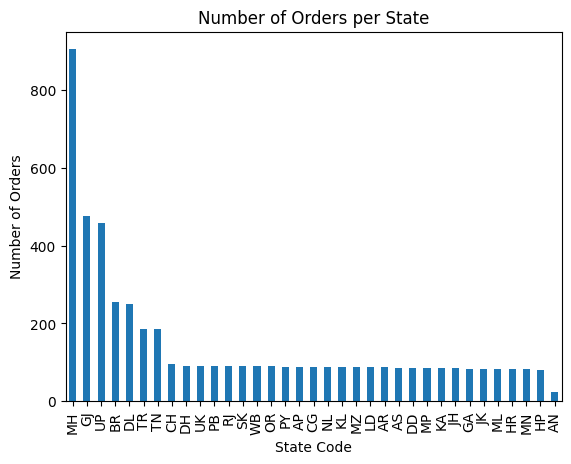

In [13]:
df['State_Code'].value_counts().plot.bar()
plt.title('Number of Orders per State')
plt.xlabel('State Code')
plt.ylabel('Number of Orders')
plt.show()


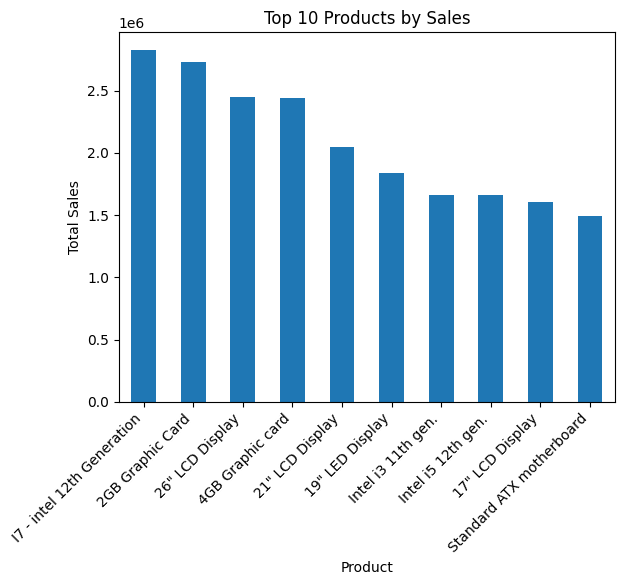

In [14]:
import matplotlib.pyplot as plt

# Summing sales by product and selecting top 10
top_products = df.groupby('Product')['Sales'].sum().nlargest(10)

# Creating the bar chart
top_products.plot.bar()
plt.title('Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.show()


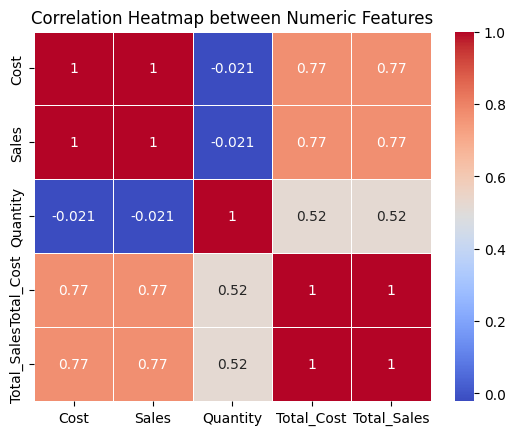

In [15]:
import seaborn as sns

# Calculating correlation matrix
corr_matrix = df[['Cost', 'Sales', 'Quantity', 'Total_Cost', 'Total_Sales']].corr()

# Creating the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap between Numeric Features')
plt.show()


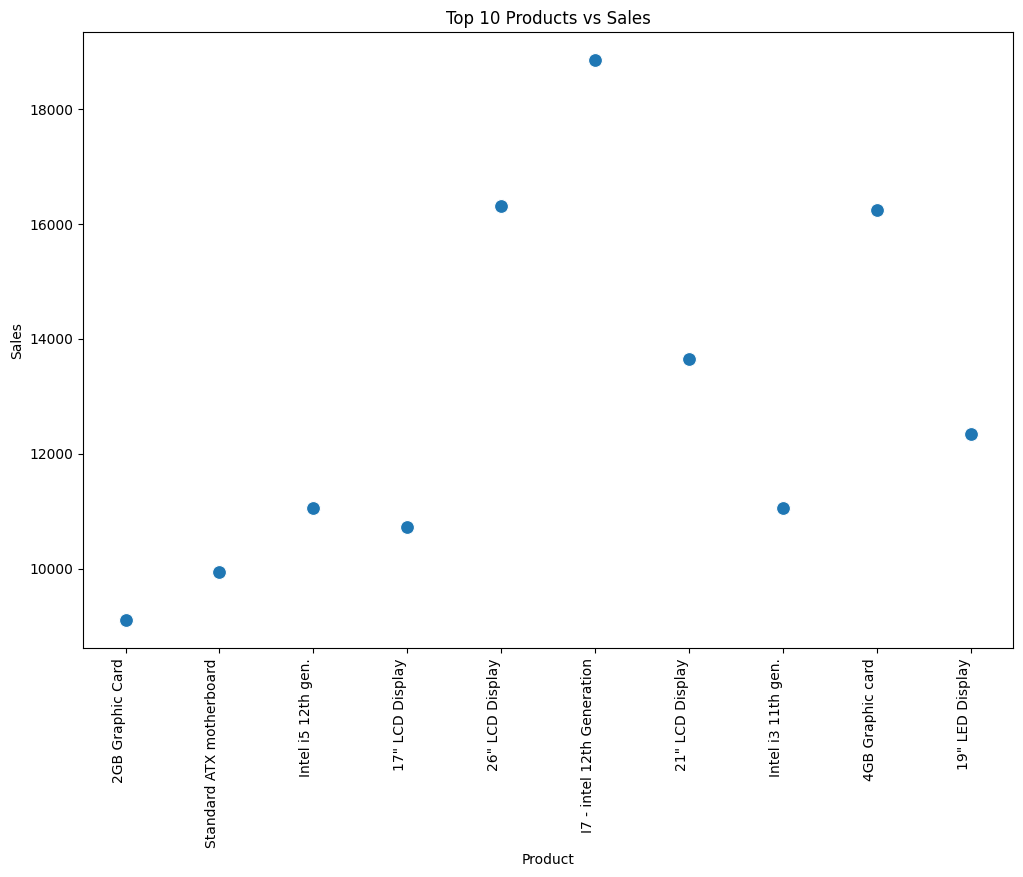

In [16]:
import seaborn as sns

# Calculate total sales by product and select the top N products
top_n_products = df.groupby('Product')['Sales'].sum().nlargest(10).index

# Filter the DataFrame to include only the top N products
top_products_df = df[df['Product'].isin(top_n_products)]

# Scatter plot: Top N Product vs Sales
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Product', y='Sales', data=top_products_df, s=100)
plt.title('Top 10 Products vs Sales')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.xticks(rotation=90, ha='right')
plt.show()



In [17]:
# Convert 'Order_Date' to datetime with the correct format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)

# Verify the conversion
print(df['Order_Date'].head())


0   2020-01-11
1   2020-01-11
2   2020-01-11
3   2020-01-11
4   2020-01-11
Name: Order_Date, dtype: datetime64[ns]


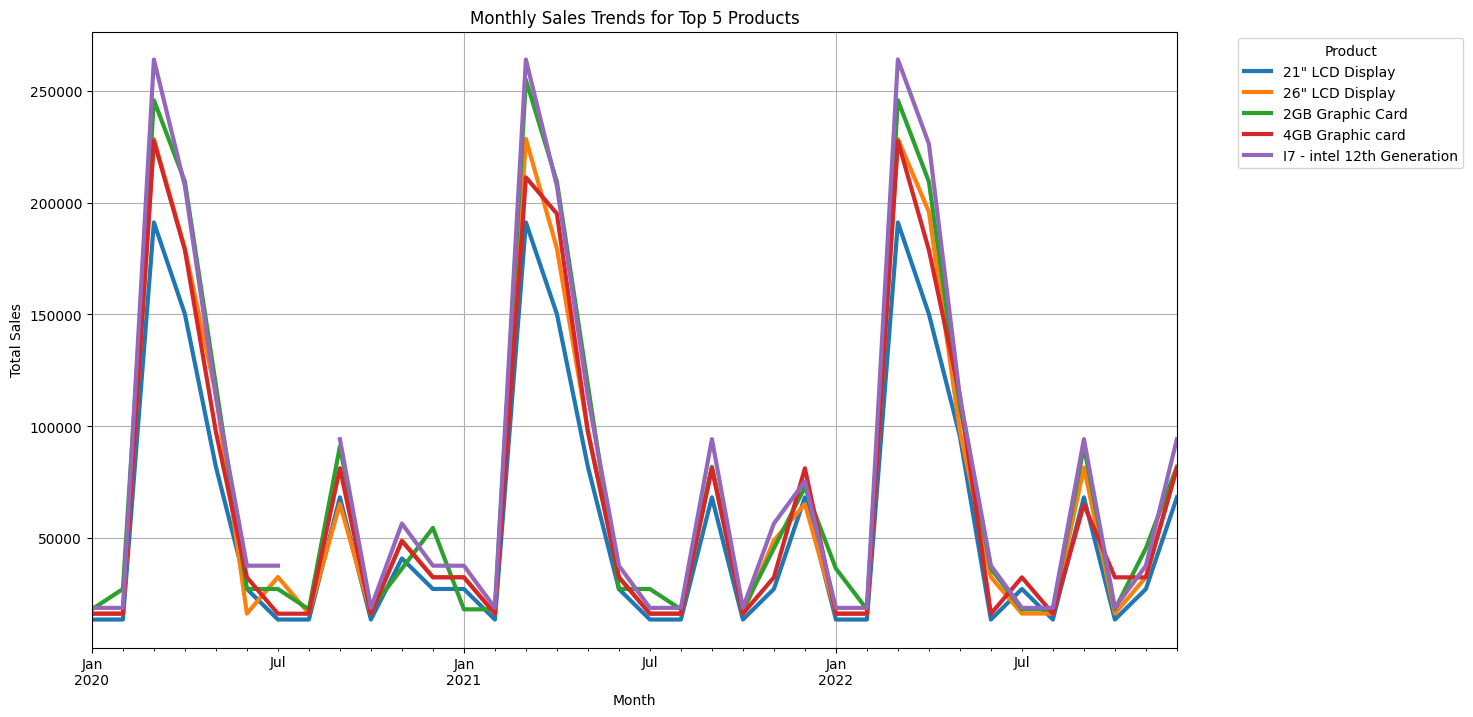

In [18]:


# Convert 'Order_Date' to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)

# Extract the month and year from the Order_Date
df['YearMonth'] = df['Order_Date'].dt.to_period('M')

# Calculate total sales by product and select the top 5 products
top_5_products = df.groupby('Product')['Sales'].sum().nlargest(5).index

# Filter the DataFrame to include only the top 5 products
top_products_df = df[df['Product'].isin(top_5_products)]

# Group by YearMonth and Product, then sum the sales
monthly_sales = top_products_df.groupby(['YearMonth', 'Product'])['Sales'].sum().unstack()

# Creating the timeline chart for the top 5 products with monthly data
plt.figure(figsize=(14, 8))
monthly_sales.plot(ax=plt.gca(), linewidth=3)  # Thicker lines for better visibility
plt.title('Monthly Sales Trends for Top 5 Products')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Seasonal Trends: The chart may reveal seasonal spikes in sales for certain products, indicating periods of high demand, possibly around holidays or special events.

Product Dominance: One or two products might consistently lead in monthly sales, showing their strong market presence compared to others.

Sales Consistency: Some products may show steady sales month-over-month, suggesting a consistent customer base and stable demand.

In [19]:
import pandas as pd

# Convert 'Order_Date' to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)

# Extract year and month from 'Order_Date'
df['YearMonth'] = df['Order_Date'].dt.to_period('M')

# Calculate total sales per month
monthly_sales = df.groupby('YearMonth')['Sales'].sum()

# Find the month with the highest sales
peak_month = monthly_sales.idxmax()
peak_sales = monthly_sales.max()

print(f"The peak sales month is {peak_month} with total sales of {peak_sales:.2f}")


The peak sales month is 2021-03 with total sales of 3721965.00


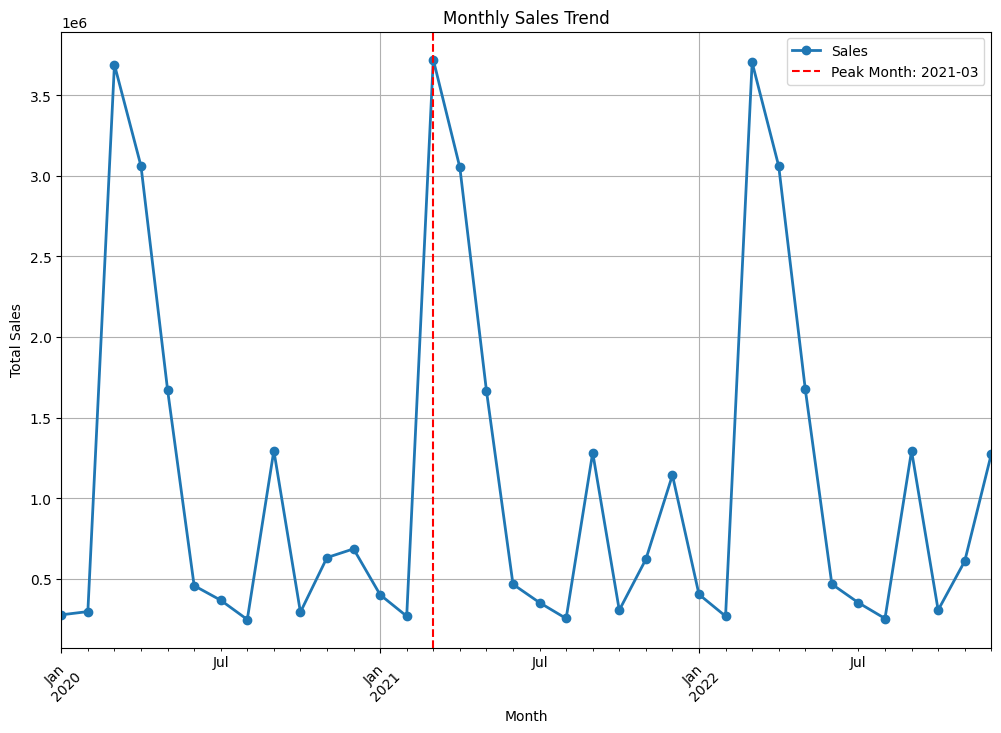

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Order_Date' to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)

# Extract year and month from 'Order_Date'
df['YearMonth'] = df['Order_Date'].dt.to_period('M')

# Calculate total sales per month
monthly_sales = df.groupby('YearMonth')['Sales'].sum()

# Find the month with the highest sales
peak_month = monthly_sales.idxmax()
peak_sales = monthly_sales.max()

# Plot the monthly sales trend
plt.figure(figsize=(12, 8))
monthly_sales.plot(marker='o', linestyle='-', linewidth=2)
plt.axvline(x=peak_month, color='r', linestyle='--', label=f'Peak Month: {peak_month}')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Highlight Peak Month: The red dashed line will indicate the month with the highest sales.

Sales Trends: The line chart shows how sales have varied over time, helping to identify trends and anomalies.

Seasonality: Peaks in specific months might correspond to seasonal patterns or special events.

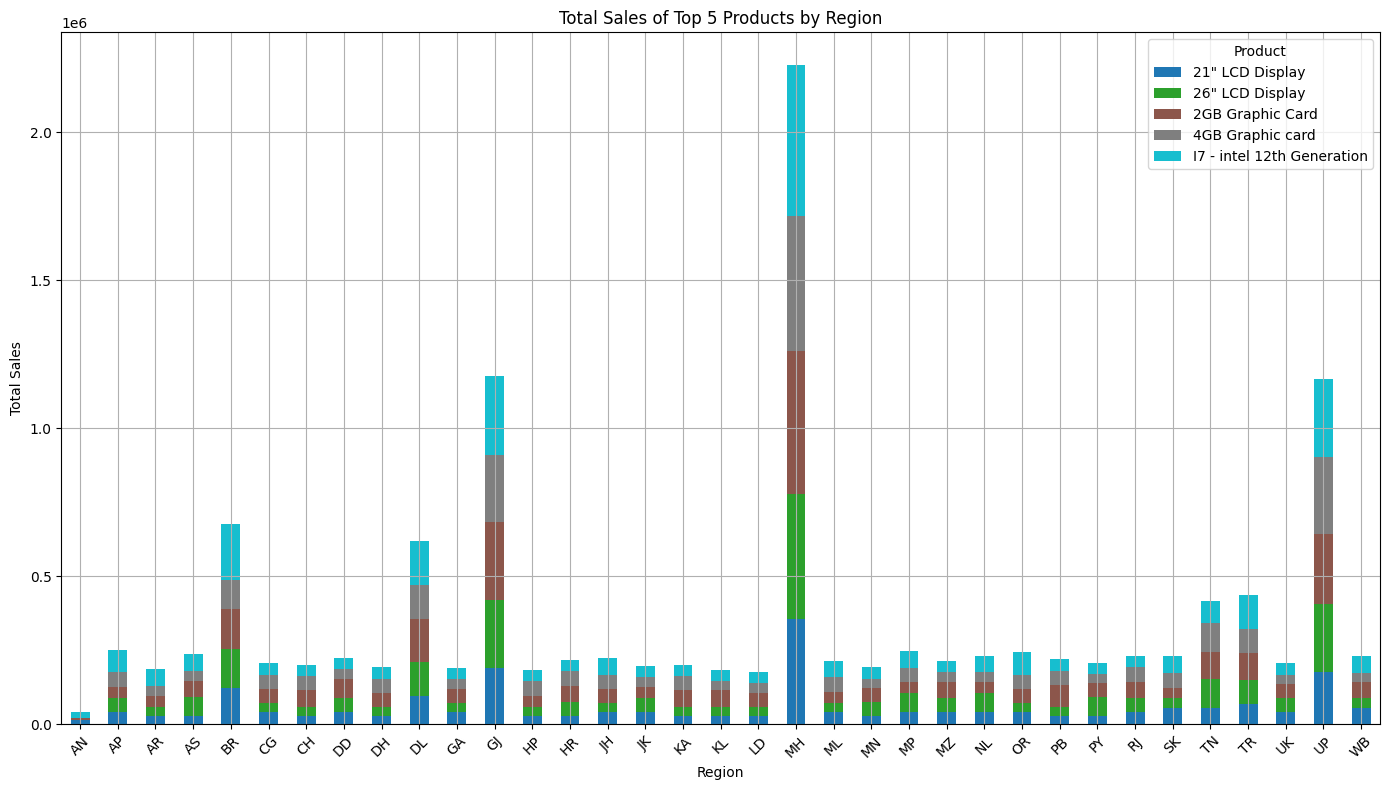

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame to include only the top 5 products
top_products_df = df[df['Product'].isin(top_5_products)]

# Calculate total sales by region and product
region_product_sales = top_products_df.groupby(['State_Code', 'Product'])['Sales'].sum().unstack()

# Plot the total sales by region for top 5 products
region_product_sales.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab10')
plt.title('Total Sales of Top 5 Products by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Product')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


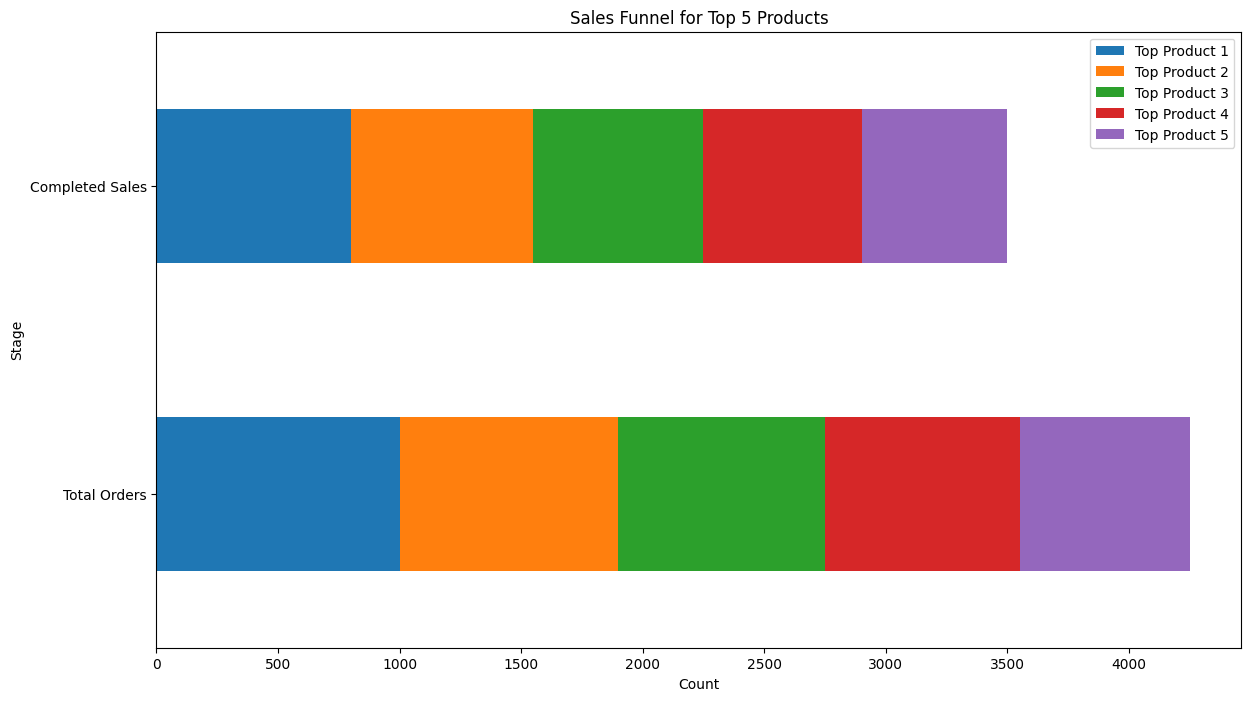

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data for funnel chart
funnel_data = {
    'Stage': ['Total Orders', 'Completed Sales'],
    'Top Product 1': [1000, 800],
    'Top Product 2': [900, 750],
    'Top Product 3': [850, 700],
    'Top Product 4': [800, 650],
    'Top Product 5': [700, 600]
}

funnel_df = pd.DataFrame(funnel_data).set_index('Stage')

# Plot funnel chart
funnel_df.plot(kind='barh', stacked=True, figsize=(14, 8))
plt.title('Sales Funnel for Top 5 Products')
plt.xlabel('Count')
plt.ylabel('Stage')
plt.show()


Conversion Rates: Visualizes conversion from total orders to completed sales, identifying potential bottlenecks.
Comparative Analysis: Compares how different products perform in the sales process.

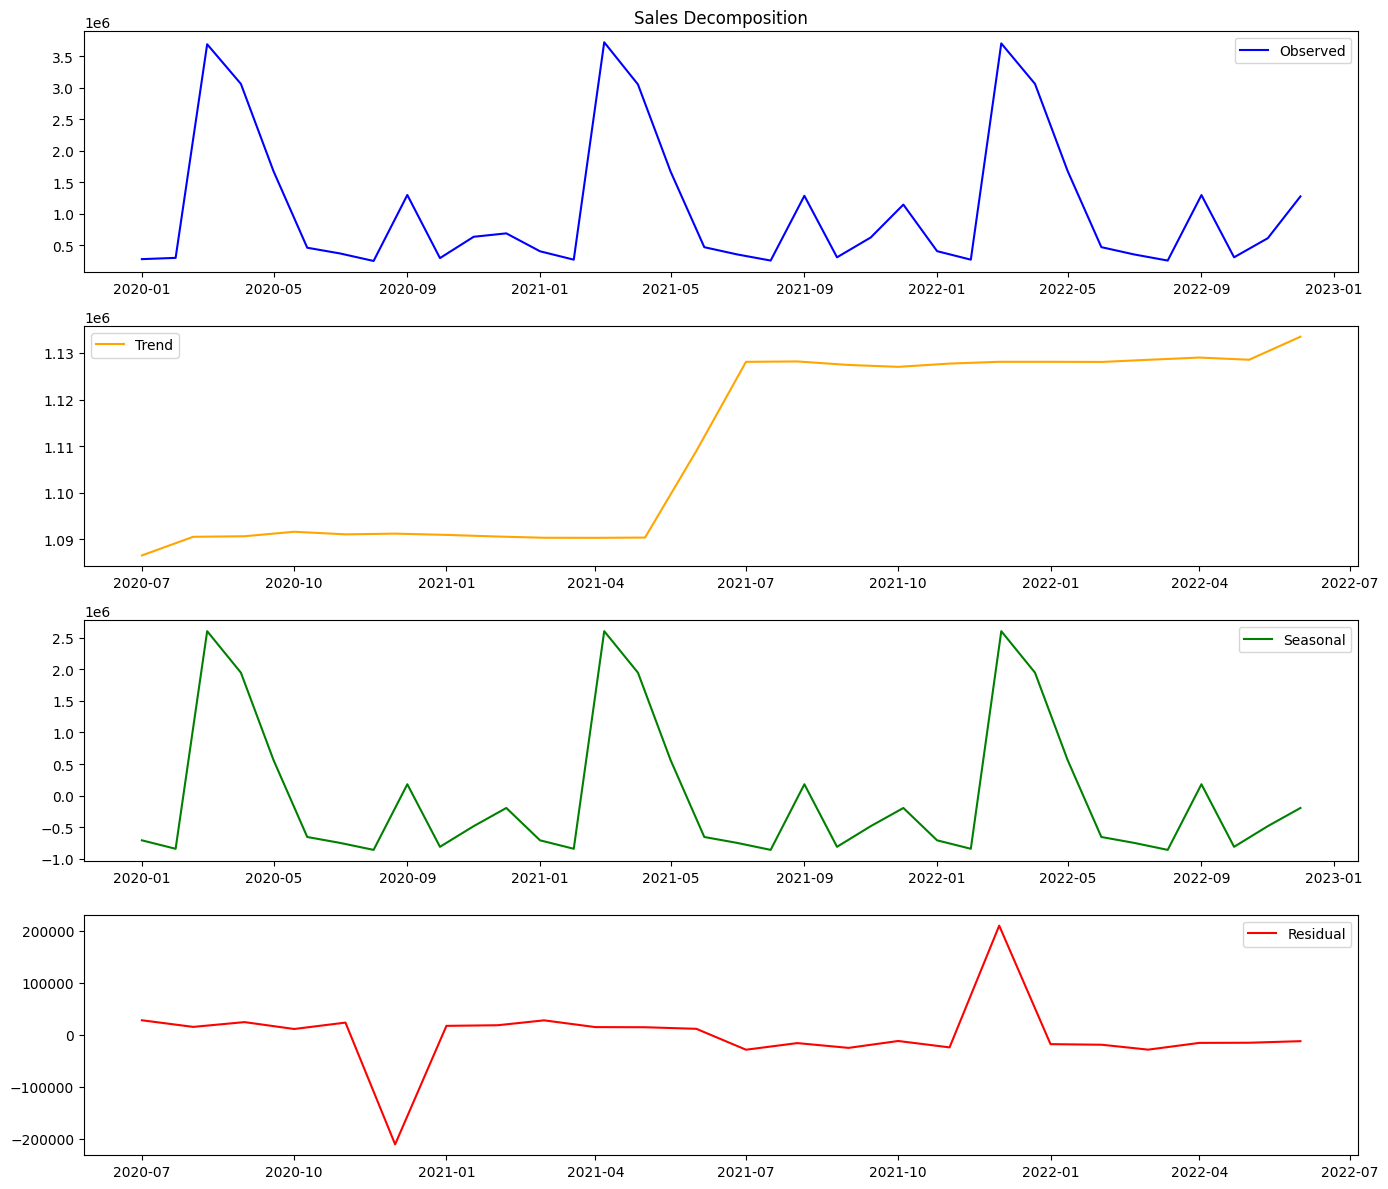

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df has been loaded and 'Order_Date' is in datetime format
# Convert 'Order_Date' to datetime if not already done
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Aggregate sales data monthly
monthly_sales = df.groupby(df['Order_Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()  # Convert to DatetimeIndex

# Decompose the time series
decomposition = seasonal_decompose(monthly_sales, model='additive')

# Plot decomposition
plt.figure(figsize=(14, 12))
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Observed', color='blue')
plt.title('Sales Decomposition')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend()

plt.tight_layout()
plt.show()


The decomposition of monthly sales reveals:

Observed: Overall sales pattern, showing fluctuations over time.                             
Trend: Long-term direction of sales, indicating growth, decline, or stability.                                                                    
Seasonal: Recurring monthly patterns, showing predictable increases or decreases in sales.

Residual: Random noise or anomalies that can't be explained by trend or seasonality.

This breakdown helps identify underlying trends and seasonal effects in sales.
